In [5]:
import roboticstoolbox as rtb
import fr3
from spatialmath import SE3

In [6]:
import importlib
importlib.reload(fr3)

<module 'fr3' from '/home/mirinae/Desktop/amm-jenga-play/fr3.py'>

In [7]:
robot=fr3.fr3()
print(robot)

ERobot: fr3 (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, 9 branches, dynamics, geometry, collision
┌─────┬──────────────┬───────┬───────────┬────────────────────────────────────────────────┐
│link │     link     │ joint │  parent   │              ETS: parent to link               │
├─────┼──────────────┼───────┼───────────┼────────────────────────────────────────────────┤
│   0 │ fr3_link0    │       │ BASE      │ SE3()                                          │
│   1 │ fr3_link0_sc │       │ fr3_link0 │ SE3()                                          │
│   2 │ fr3_link1    │     0 │ fr3_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│   3 │ fr3_link1_sc │       │ fr3_link1 │ SE3()                                          │
│   4 │ fr3_link2    │     1 │ fr3_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│   5 │ fr3_link2_sc │       │ fr3_link2 │ SE3()                                          │
│   6 │ fr3_link3    │     2 │ fr3_link2 │ SE3(0, -0.316, 0; 90°, -0

In [8]:
for i in range(len(robot.links)):
    print(robot.links[i])


Link("fr3_link0")
Link("fr3_link0_sc", SE3(), parent="fr3_link0")
Link("fr3_link1", SE3(0, 0, 0.333) ⊕ Rz(q), parent="fr3_link0", qlim=[-2.31, 2.31], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link1_sc", SE3(), parent="fr3_link1")
Link("fr3_link2", SE3(-90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link1", qlim=[-1.51, 1.51], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link2_sc", SE3(), parent="fr3_link2")
Link("fr3_link3", SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link2", qlim=[-2.49, 2.49], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link3_sc", SE3(), parent="fr3_link3")
Link("fr3_link4", SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link3", qlim=[-2.75, -0.446], m=0, r=[0, 0, 0], I=[0, 0, 0, 0, 0, 0], Jm=0, B=0, Tc=[0, 0], G=0)
Link("fr3_link4_sc", SE3(), parent="fr3_link4")
Link("fr3_link5", SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q), parent="fr3_link4", qlim=[-2.48, 2.48],

In [9]:
import inspect
print(inspect.getmembers(robot,lambda x:not inspect.isroutine(x)))

[('_SceneNode__T', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('_SceneNode__scene', <capsule object "Node" at 0x7efdfb4310f0>), ('_SceneNode__wT', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('_SceneNode__wq', array([0., 0., 0., 1.])), ('_T', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('_T_reference', array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])), ('__abstractmethods__', frozenset()), ('__class__', <class 'fr3.fr3'>), ('__delattr__', <method-wrapper '__delattr__' of fr3 object at 0x7efdfb534520>), ('__dict__', {'_SceneNode__wT': array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]), '_SceneNode__wq': array([0., 0., 0., 1.]), '_SceneNode__T': array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1.

In [10]:
Te=robot.fkine(robot.qr)
print(Te)

   0.7036   -0.7036    0.09983   0.484     
  -0.7071   -0.7071    0         0         
   0.07059  -0.07059  -0.995     0.4126    
   0         0         0         1         



In [11]:
Tep=SE3.Trans(.6,-.3,.1)*SE3.OA([0,1,0],[0,0,-1])
sol=robot.ik_LM(Tep)
print(sol)

(array([ 0.12479038,  0.81002475, -0.68691379, -1.69083948,  0.63957542,
        2.26344392,  2.30825414]), 1, 57, 3, 5.419394038454869e-11)


# IMPORTANT(solved)
There is a problem, after solve inverse kinematics it has DoF of only 4

In [12]:
q_pickup=sol[0]
print(robot.fkine(q_pickup))

  -1        -3.806e-06 -3.543e-06  0.6       
  -3.806e-06  1        -5.791e-06 -0.3       
   3.543e-06 -5.791e-06 -1         0.1       
   0         0         0         1         



In [13]:
from PIL import Image

## Hand not rendered
- gripper configuration issue
- python file needs review

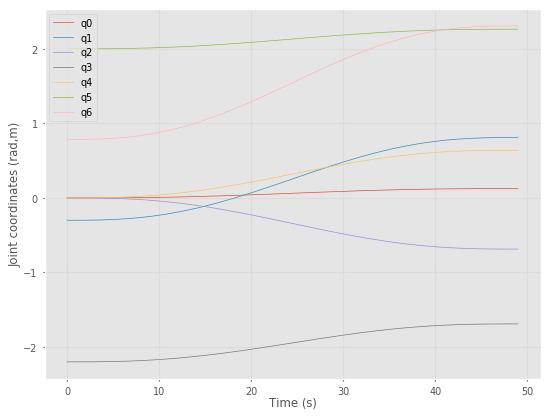

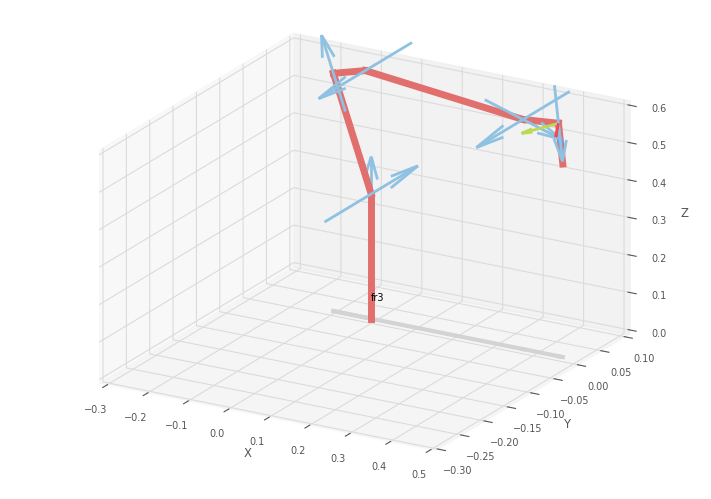

Swift backend, t = 2.499999999999999, scene:
  fr3

<Figure size 640x480 with 0 Axes>

In [14]:
qt=rtb.jtraj(robot.qr,q_pickup,50)
rtb.tools.plot.xplot(qt.q)
robot.plot(qt.q,backend='pyplot',movie='fr3.gif',limits=[-.3,.5,-.3,.1,0,.6])
loop=False
#loop=True
robot.plot(qt.q,backend='swift',loop=loop)
